In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

import warnings
warnings.filterwarnings("ignore")

In [215]:
"""
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. 
You are provided the following set of information about the waterpoints:

Build a classifier to predict the condition of a water well, using information about the sort of pump, when it was installed, etc. 
Note that this is a ternary classification problem.



amount_tsh : Total static head (amount water available to waterpoint)
date_recorded : The date the row was entered
funder : Who funded the well
gps_height : Altitude of the well
installer : Organization that installed the well
longitude : GPS coordinate
latitude : GPS coordinate
wpt_name : Name of the waterpoint if there is one
num_private :Private use or not
basin : Geographic water basin
subvillage : Geographic location
region : Geographic location
region_code : Geographic location (coded)
district_code : Geographic location (coded)
lga : Geographic location
ward : Geographic location
population : Population around the well
public_meeting : True/False
recorded_by : Group entering this row of data
scheme_management : Who operates the waterpoint
scheme_name : Who operates the waterpoint
permit : If the waterpoint is permitted
construction_year : Year the waterpoint was constructed
extraction_type : The kind of extraction the waterpoint uses
extraction_type_group : The kind of extraction the waterpoint uses
extraction_type_class : The kind of extraction the waterpoint uses
management : How the waterpoint is managed
management_group : How the waterpoint is managed
payment : What the water costs
payment_type : What the water costs
water_quality : The quality of the water
quality_group : The quality of the water
quantity : The quantity of water
quantity_group : The quantity of water
source : The source of the water
source_type : The source of the water
source_class : The source of the water
waterpoint_type : The kind of waterpoint
waterpoint_type_group : The kind of waterpoint"""



pd.set_option('display.max_columns', None)  
df_1 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_1['target'] = labels['status_group']

In [216]:
df_1['target'] = df_1['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df_1.drop('id',axis=1, inplace=True)

In [217]:

df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


### Exploratory Data Analysis

In [218]:
df_1.shape

(59400, 40)

In [219]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [220]:
#df_1.nunique()
def unique_values(df):
    info_df = df.info()
    print(dashes)
    print('\n')
    num_unique = df.nunique()
    print("Number of uniques values in each Feature/Column:")
    
    return num_unique

unique_values(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

#### Null Values

In [221]:
def nan_more_fifty(df): 
    for column in df:
        if df[column].isnull().sum()*100.0/df.shape[0] > 50:
            df.drop(column,1, inplace=True)
        #else:
    print('There are no columns with more than 50% null values')
    return df        

In [222]:
revised = nan_more_fifty(df_1)

There are no columns with more than 50% null values


The following features have null values:
 Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')


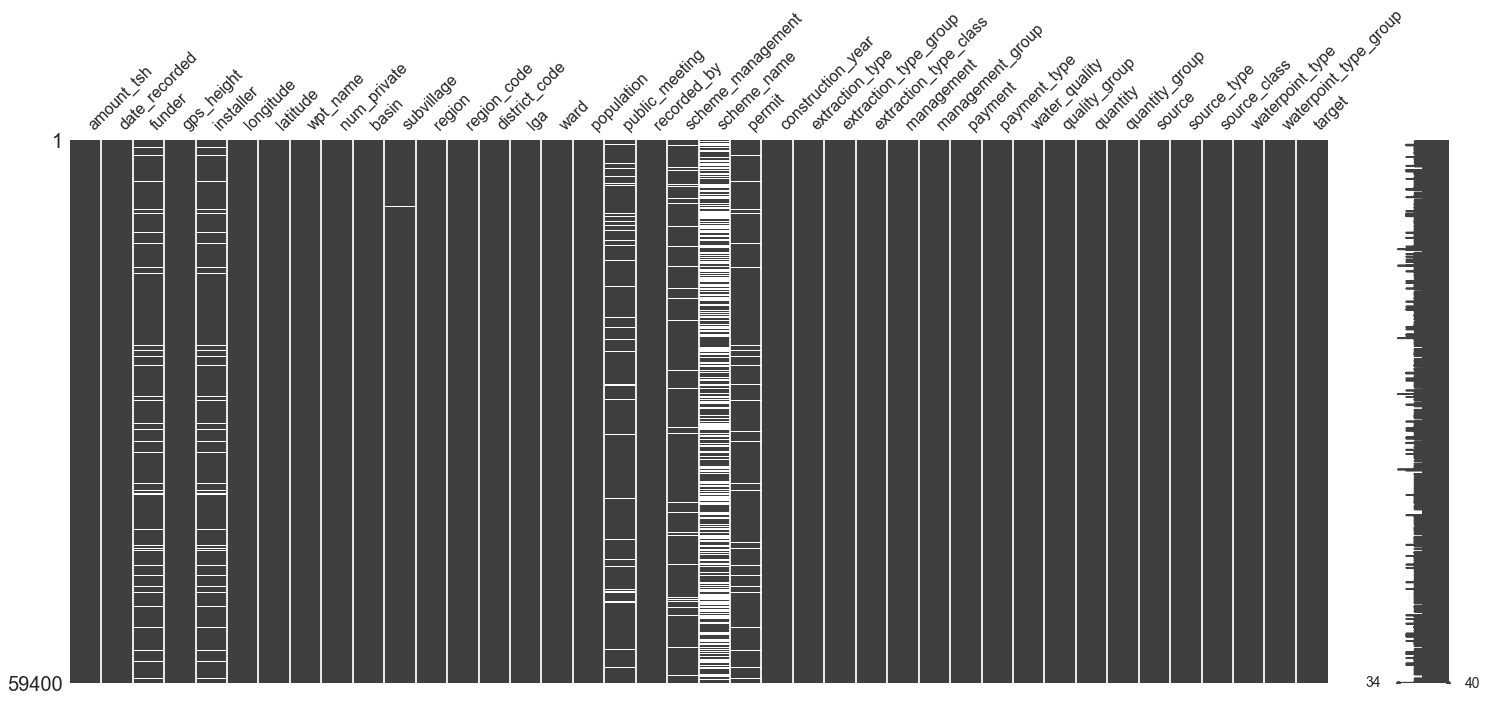

In [223]:
def count_null(df):
    #only features w/null values
    null_columns=df.columns[df.isnull().any()]
    test = df[null_columns].isnull().sum()
    if test.empty:
        print('No nulls')
    else:
        print(f'The following features have null values:\n {null_columns}')
    
    # Visualize missing values as a matrix 
    msno.matrix(df) 
    
    return test
    
nan_values = count_null(df_1)  

In [224]:
df_1.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,target
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,0.529596
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.628080
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,0.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2.000000


### Visualization

In [225]:
# #value_counts
# def countplot_w_hue(df, col=None, hue_col=None, rot=None):
#     fig,ax = plt.subplots()
#     sns.countplot(data=df, x=col, hue=hue_col);
#     ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':rot,'ha':'right'});   

In [226]:
#countplot_w_hue(df_1, col='quantity', hue_col='target',rot=40)    

In [227]:
def feature_distribution(data, col= None, ticklabels=None, figsize=None):
    """
    plots a seaborn distplot for column w/customization
    Args
    df (df)
    col (int)
    hist_kws (dict)
    figsize (dict)
    
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    #sns.countplot(data[col], ax=ax)
    #(x='management_group',data=df_1, hue='target')
    sns.countplot(data=data, x=col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

#### target
0 standards for wells that are functioning. 1 represents wells that don't work.  2 is for wells that work but need repair.<br>

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


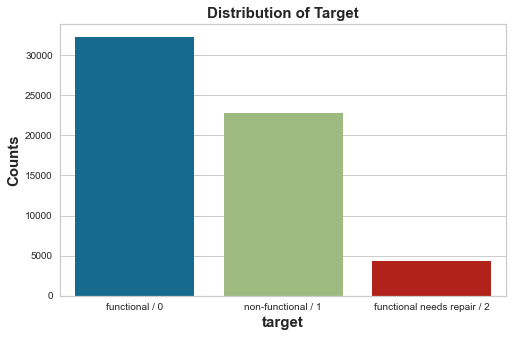

In [228]:
feature_distribution(df_1, col='target',ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

In [237]:
def feature_w_hue(df, col= None, hue_col=None, rot=None, figsize=None):
   
    print(df[col].value_counts(dropna=False))
    print('\n')
    print(round(df[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    """
    def countplot_w_hue(df, col=None, hue_col=None, rot=None):
    fig,ax = plt.subplots()
    sns.countplot(data=df, x=col, hue=hue_col);
    """
    fig,ax = plt.subplots(figsize=figsize)
    #sns.countplot(data=data, x=col, ax=ax)
    sns.countplot(data=df, x=col, hue=hue_col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    #ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_title(f'How {col} relates to {hue_col}',fontdict=label_font)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':rot,'ha':'right'}); 
    #ax.set_xticklabels(ticklabels)


#### quantity

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


enough          0.559
insufficient    0.255
dry             0.105
seasonal        0.068
unknown         0.013
Name: quantity, dtype: float64
---------------------------------------------


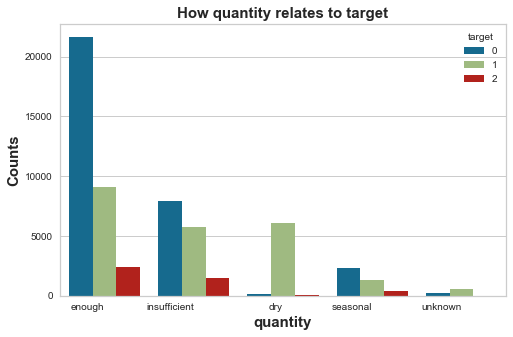

In [238]:
feature_w_hue(df_1, col='quantity', hue_col='target',rot=None,figsize=(8,5))

#### installer

In [15]:
#how do I plot top installer and see how they compare to functioning and non-functioning
installer = df_1['installer'].value_counts(dropna=False).head(10)
installer

DWE           17402
NaN            3655
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
KKKT            898
Hesawa          840
0               777
TCRS            707
Name: installer, dtype: int64

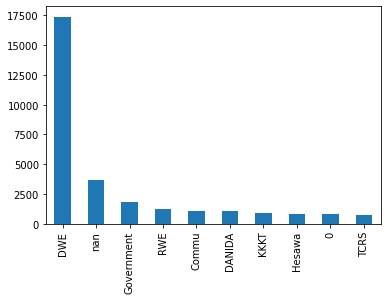

In [16]:
#countplot_w_hue(df_1, col='installer', hue_col='target',rot=40) 
installer.plot(kind='bar')

#### construction_year
Feature 'construction_year' is defined as the year the waterpoint was constructed. Feature is an int datatype. An issue is that 35% of the categories has a value of 0. The next largest category is year 2010 with 4% and then year 2008 with 4%.

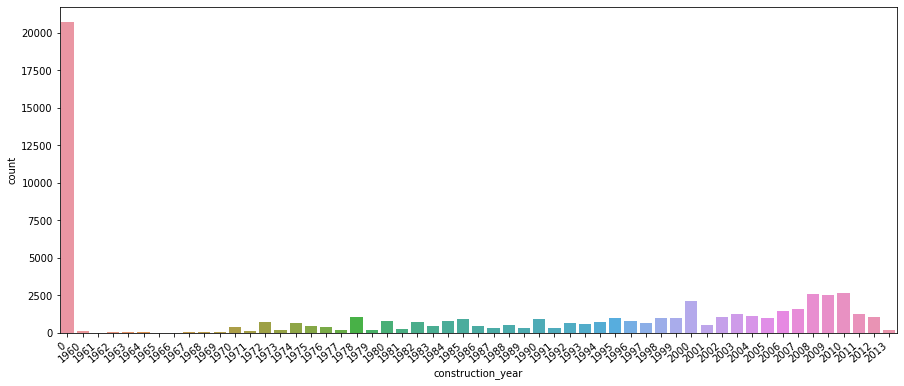

In [17]:
#feature_distribution(df_1, col='construction_year',ticklabels=['construction_year'.index],figsize=(8,5))
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(x='construction_year',data=df_1);
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':40,'ha':'right'});

In [19]:
df_1['no_construct_yr'] = df_1['construction_year']== 0

In [20]:
df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,no_construct_yr
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,False
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,False
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,False
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,False
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,True


Text(0.5, 1.0, 'Water Pump Construction by Years')

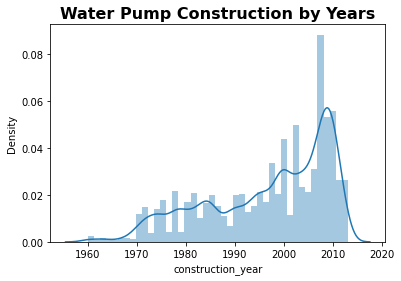

In [21]:
sns.distplot(df_1['construction_year'][df_1['construction_year']>0]);
plt.title("Water Pump Construction by Years", fontsize=16, fontweight='bold')

#### recorded year
Feature 'date_recorded' defined as the date the row was entered. Feature date_recorded is an object. <br>

In [22]:
df_1['date_recorded'].value_counts(dropna=True)

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-07-01      1
2013-01-01      1
2013-01-06      1
2011-09-16      1
2011-09-17      1
Name: date_recorded, Length: 356, dtype: int64

In [23]:
#when data point recroded
df_1['date_recorded'].min()

'2002-10-14'

In [24]:
df_1['date_recorded'].max()

'2013-12-03'

#### basin
basin is defined as geographic water basin.  Lake Victoria, Pangani, Rufiji and Internal have the highest number of wells.  Rufiji has a high number of wells but also the highest number of functioning wells but a lower number non-functioning wells. 

In [25]:
df_1['basin'].value_counts(normalize=True)

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                     0.134276
Internal                   0.131061
Lake Tanganyika            0.108283
Wami / Ruvu                0.100791
Lake Nyasa                 0.085606
Ruvuma / Southern Coast    0.075640
Lake Rukwa                 0.041313
Name: basin, dtype: float64

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


Lake Victoria              0.173
Pangani                    0.151
Rufiji                     0.134
Internal                   0.131
Lake Tanganyika            0.108
Wami / Ruvu                0.101
Lake Nyasa                 0.086
Ruvuma / Southern Coast    0.076
Lake Rukwa                 0.041
Name: basin, dtype: float64
---------------------------------------------


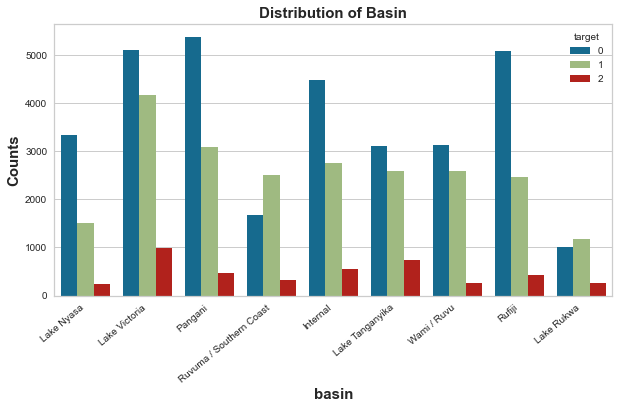

In [232]:
# fig,ax = plt.subplots(figsize=(10,8))
# sns.countplot(x='basin',data=df_1, hue='target');
# ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':40,'ha':'right'});
feature_w_hue(df_1, col='basin', hue_col='target',rot=40,figsize=(10,5))

In [27]:
piv_df= df_1[['basin','target','construction_year']]
piv_table = piv_df.pivot_table(index='basin',
                           columns='target', aggfunc='count')
piv_table

construction_year           
target                                  0     1    2
basin                                               
Internal                             4482  2746  557
Lake Nyasa                           3324  1511  250
Lake Rukwa                           1000  1184  270
Lake Tanganyika                      3107  2583  742
Lake Victoria                        5100  4159  989
Pangani                              5372  3091  477
Rufiji                               5068  2471  437
Ruvuma / Southern Coast              1670  2497  326
Wami / Ruvu                          3136  2582  269

In [28]:
order = pd.crosstab(df_1['basin'],df_1['target'])
order

target,0,1,2
basin,,,
Internal,4482,2746,557
Lake Nyasa,3324,1511,250
Lake Rukwa,1000,1184,270
Lake Tanganyika,3107,2583,742
Lake Victoria,5100,4159,989
Pangani,5372,3091,477
Rufiji,5068,2471,437
Ruvuma / Southern Coast,1670,2497,326
Wami / Ruvu,3136,2582,269


In [29]:
"""
usergroup is the largest entites/management groups involved in water wells.  
vwc is the largest in hte management_group. 

"""
df_1.groupby(['management_group','management']).count() 

amount_tsh  date_recorded  funder  \
management_group management                                            
commercial       company                  685            685     663   
                 private operator        1971           1971    1957   
                 trust                     78             78      78   
                 water authority          904            904     836   
other            other                    844            844     837   
                 other - school            99             99      99   
parastatal       parastatal              1768           1768    1624   
unknown          unknown                  561            561     533   
user-group       vwc                    40507          40507   37632   
                 water board             2933           2933    2715   
                 wua                     2535           2535    2308   
                 wug                     6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  basin  subvillage  \
management_group management                                                   
commercial       company                685          685    685         685   
                 private operator      1971         1971   1971        1932   
                 trust                   78           78     78          78   
                 water authority        904          904    904         895   
other            other                  844          844    844         839   
                 other - school          99           99     99          99   
parastatal       parastatal            1768         1768   1768        1768   
unknown          unknown                561          561    561         561   
user-group       vwc                  40507        40507  40507       40189   
                 water board           2933         2933   2933        2933   
                 wua                   2535         2535   2535        2535   
                 wug                   6515         6515   6515        6515   

                                   region  region_code  district_code    lga  \
management_group management                                                    
commercial       company              685          685            685    685   
                 private operator    1971         1971           1971   1971   
                 trust                 78           78             78     78   
                 water authority      904          904            904    904   
other            other                844          844            844    844   
                 other - school        99           99             99     99   
parastatal       parastatal          1768         1768           1768   1768   
unknown          unknown              561          561          

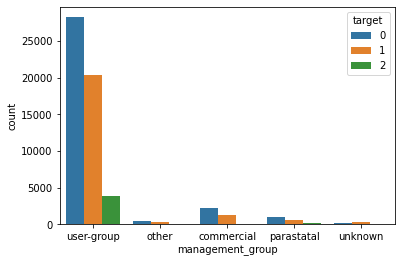

In [30]:
sns.countplot(x='management_group',data=df_1, hue='target');

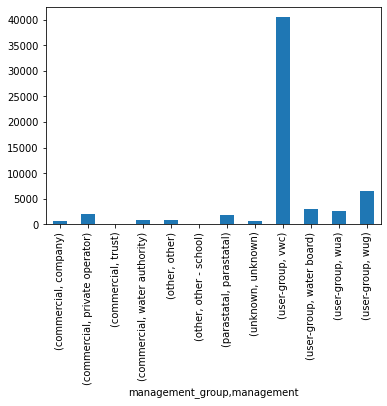

In [31]:
df_1.groupby(['management_group','management']).count()['target'].plot(kind='bar')

#### payment_type

In [32]:
"""
payment : What the water costs
payment_type : What the water costs
"""
df_1['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [33]:
df_1['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

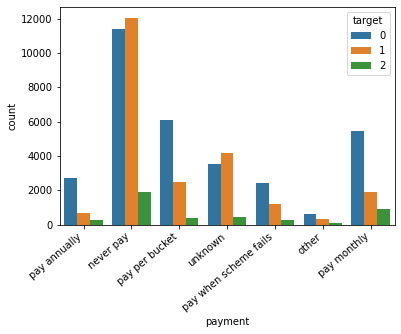

In [34]:
countplot_w_hue(df_1, col='payment', hue_col='target',rot=40)   

#### quality_group
This feature is defined as the quality of the water. The largest category is good which is 85% of the category. There are almost 30,000 wells that have good water that are functional, but there are also almost 20,000 wells that aren't functioning.<br>
<br>
This is a crucal factor to work with because the water is considered good and now concentrate on getting the wells working.<br>

In [35]:
df_1['quality_group'].value_counts(dropna=False), df_1['quality_group'].value_counts(normalize=True)

(good        50818
 salty        5195
 unknown      1876
 milky         804
 colored       490
 fluoride      217
 Name: quality_group, dtype: int64,
 good        0.855522
 salty       0.087458
 unknown     0.031582
 milky       0.013535
 colored     0.008249
 fluoride    0.003653
 Name: quality_group, dtype: float64)

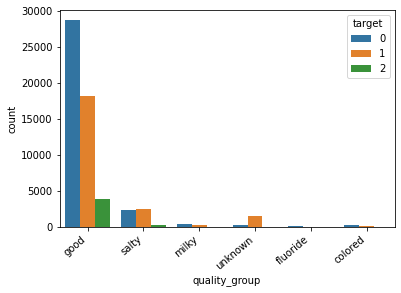

In [36]:
#ax = sns.countplot(x='quality_group', hue="target", data=df_1)
countplot_w_hue(df_1, col='quality_group', hue_col='target',rot=40)  

### Preprocessing

In [37]:
"""
Feature contain similar representation of data:
extraction_type
extraction_type_group
extraction_type_class 

(payment, payment_type),

(water_quality, quality_group), 

(source, source_class), 

(subvillage, region, region_code, district_code, lga, ward), 

(waterpoint_type, waterpoint_type_group)  
Risk overfitting our data during training by including all the features in our analysis, which can be dropped.

id can be droped because it is unique for each instance.
num_private is ~99% zeros



"""
print('Features which may be duplicative')

Features which may be duplicative


In [38]:
"""
some of the features that seemed would impact predcition of whethe wells functions based on intuition. 
amount_tsh (amount of water available to water point)
gps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.



"""

'\nsome of the features that seemed would impact predcition of whethe wells functions based on intuition. \namount_tsh (amount of water available to water point)\ngps_height, basin, installer, population, scheme_management, construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in identifying the pump status.\n\n\n\n'

#### funder 
Column 'funder' is defined as who funded the well.<br>
Nan values: 3635<br>
'0': 777<br>
categories that have unique values of 10 or less: 3001<br> 
<br>
Categories with unique values of 10 or less were grouped in category titled 'other'<br>

In [39]:
"""
funder                    1897
installer                 2145


NaN: 3635
'0': 777
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania          9084
NaN                             3635
Danida                          3114
Hesawa                          2202
Rwssp                           1374
                                ... 
Kitiangare Village Community       1
Ruvu Darajani                      1
Makanya Sisal Estate               1
Mhina                              1
If                                 1
Name: funder, Length: 1898, dtype: int64

In [40]:
len(df_1[df_1['funder']== '0'])

777

In [41]:
#df_a = df_a.apply(lambda x: x.mask(x.map(x.value_counts())< 10, np.NaN) if x.name=='funder' else x)
#funder
#df_1['funder'].loc[(df_1['funder'] == '0')] = np.NaN
df_1.loc[(df_1['funder'] == '0'),'funder'] = np.NaN

In [42]:
"""
NaN: 3635
"""
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Mhina                        1
Kibara Foundation            1
Roman Cathoric Church        1
Omar Ally                    1
If                           1
Name: funder, Length: 1897, dtype: int64

In [43]:
df_1[df_1['funder']== '0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,no_construct_yr


In [44]:
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='funder' else x)

In [45]:
df_1['funder'].value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       4412
Danida                    3114
other                     3001
Hesawa                    2202
                          ... 
Millenium                   10
Nado                        10
Tag                         10
Sijm                        10
Snv Ltd                     10
Name: funder, Length: 407, dtype: int64

#### installer
Column 'installer' is defined as the organization that installed the well.<br>
unique values: 2145<br>
NaN: 3655<br>
'0': 777<br>
<br>
categories of unique values with a count of 10 or less were grouped in a category called 'other'.<br> 

In [46]:
"""
installer unique: 2145

NaN: 3655
0:   777

"""
df_1['installer'].value_counts(dropna=False)

DWE                      17402
NaN                       3655
Government                1825
RWE                       1206
Commu                     1060
                         ...  
TASAF and MMEM               1
ODA                          1
MKONGO CONSTRUCTION          1
Pet  Corporation  Ltd        1
Government/TCRS              1
Name: installer, Length: 2146, dtype: int64

In [47]:
len(df_1[df_1['installer']=='0'])

777

In [48]:
df_1['installer'].loc[(df_1['installer'] == '0')] = np.NaN

In [49]:
#pd.set_option('display.max_rows', None)
#counting = df_1['installer'].value_counts()
df_1 = df_1.apply(lambda x: x.mask(x.map(x.value_counts())< 10, 'other') if x.name=='installer' else x)

In [50]:
df_1['installer'].value_counts()

DWE           17402
other          3533
Government     1825
RWE            1206
Commu          1060
              ...  
IDEA             10
Maswi            10
Nice             10
KMCL             10
Rips             10
Name: installer, Length: 423, dtype: int64

#### region / region_code
region and region_code are essentially the same columns. region_code is numeric.<br>
NaN: 0

In [51]:
df_1['region'].value_counts(dropna=False)

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [52]:
df_1['region_code'].value_counts(dropna=False)

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

#### scheme_managemnt / scheme_name
scheme_management : Who operates the waterpoint<br>
scheme_name : Who operates the waterpoint<br>

In [53]:
"""
scheme_management           12
scheme_name               2696

NaN: 3877
"""
df_1['scheme_management'].value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [54]:
df_1['scheme_name'].value_counts(dropna=False)

NaN                       28166
K                           682
None                        644
Borehole                    546
Chalinze wate               405
                          ...  
BL Orkugu                     1
BL Nshere Juu                 1
Burieni water supply          1
Sobodo Borehole Scheme        1
Ngumbaru Extension            1
Name: scheme_name, Length: 2697, dtype: int64

In [55]:
df_1.loc[df_1['scheme_name']== '0']

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,no_construct_yr


#### extraction_type / extraction_type_group / extraction_type_class
Defined as The kind of extraction the waterpoint uses.

In [56]:
"""
extraction_type        59400 non-null  object 
extraction_type_group  59400 non-null  object 
extraction_type_class  59400 non-null  object 

"""
df_1['extraction_type'].value_counts(dropna=False)

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [57]:
df_1['extraction_type_group'].value_counts(dropna=False)

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [58]:
df_1['extraction_type_class'].value_counts(dropna=False)

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [59]:
# #problems: 'scheme_management','lga'
# cols = ['amount_tsh','longitude','latitude','num_private','basin','region','district_code','population',
#         'public_meeting','recorded_by','permit','construction_year','extraction_type_group','management','management_group','payment',
#         'payment_type', 'quality_group','quantity','source','waterpoint_type','target']   
# data_df = df_1[cols]

#### managmeent / management_group

In [60]:
df_1['management'].value_counts(dropna=False)

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [61]:
"""
NaN: 0
"""
df_1['management_group'].value_counts(dropna=False)

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

#### payment / payment_type

In [62]:
df_1['payment'].value_counts(dropna=False)

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [63]:
df_1['payment_type'].value_counts(dropna=False)

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### water_quality / quality_group
Both columns are defined as the quality of the water. Both columns have an category 'unknown' which constitutes 3% of the feature.<br>
I kept quality_group becuase it more specifically defines water quality.

In [64]:
df_1['water_quality'].value_counts(normalize=True)

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64

In [65]:
df_1['quality_group'].value_counts(dropna=False)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### quantity / quantity_group
Both columns are defined as the quantity of water.  The columns are duplicative.  I kept the column 'quantity'.

In [66]:
df_1['quantity'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [67]:
df_1['quantity_group'].value_counts(dropna=False)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### source / source_type / source_class 
Columns 'source', 'source_type' and 'source_class' are  defined as the source of the water.<br>
Only keep 'source' b/c it includes the categories of hte others.<br>

In [68]:
"""
source : The source of the water
source_type : The source of the water
source_class : The source of the water

"""
df_1['source'].value_counts(dropna=False)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [69]:
df_1['source_type'].value_counts(dropna=False)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [70]:
df_1['source_class'].value_counts(dropna=False)

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

#### waterpoint_type / waterpoint_type_group
Both columns 'waterpoint_type' and 'waterpoint_type_group' are defined as the kind of waterpoint.  Both columns appear to be duplicative.  I am keeping waterpoint_type because it breaks down the categories a little more.<br>

In [71]:
"""
waterpoint_type              7
waterpoint_type_group        6
"""
df_1['waterpoint_type'].value_counts(dropna=False)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [72]:
df_1['waterpoint_type_group'].value_counts(dropna=False)

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [160]:
df_2 = df_1.copy()

In [161]:
"""
amount_tsh : Total static head (amount water available to waterpoint)
features['water/person'] = features['amount_tsh'] / features['population']
"""
df_2['water/person'] = df_2['amount_tsh'] / df_2['population']

In [162]:
df_2.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,no_construct_yr,water/person
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,False,55.045872
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,False,0.000000
2,25.0,2013-02-25,other,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,False,0.100000
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,False,0.000000
4,0.0,2011-07-13,other,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,True,NaN


In [73]:
#problems: 'scheme_management','lga'
cols = ['amount_tsh','longitude','latitude','num_private','basin','region','district_code','population',
        'public_meeting','recorded_by','permit','construction_year','extraction_type_group','management','management_group','payment',
        'payment_type', 'quality_group','quantity','source','waterpoint_type','no_construct_yr','target']   
data_df = df_1[cols]

#### Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
y = data_df['target']
X = data_df.drop('target',axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44550, 22)
(44550,)
(14850, 22)
(14850,)


#### Address Null Values

In [78]:
from sklearn.impute import SimpleImputer

In [79]:
nan_values.index

Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')

In [80]:
nan_col = ['public_meeting', 'permit']
X_train_nan = X_train[nan_col]
X_test_nan = X_test[nan_col]

In [81]:
from sklearn.impute import SimpleImputer

def remake(X_train_cln,X_train):
       return pd.DataFrame(X_train_cln,columns=X_train.columns, index=X_train.index)

def impute(X_train, X_test):
    imputer = SimpleImputer(strategy='most_frequent')
    X_train_cln = remake(imputer.fit_transform(X_train), X_train) #remake function
    X_test_cln = remake(imputer.transform(X_test ), X_test)
    X_test_cln
    #X_train_cln = X_train_cln.astype(float)
    #X_test_cln = X_test_cln.astype(float)
    
    return X_train_cln, X_test_cln

In [82]:
X_train_cln, X_test_cln = impute(X_train_nan,X_test_nan)

In [83]:
# X_train_cln.head()

In [84]:
X_train.isna().sum()

amount_tsh                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
district_code               0
population                  0
public_meeting           2525
recorded_by                 0
permit                   2285
construction_year           0
extraction_type_group       0
management                  0
management_group            0
payment                     0
payment_type                0
quality_group               0
quantity                    0
source                      0
waterpoint_type             0
no_construct_yr             0
dtype: int64

In [85]:
X_train.shape, X_test.shape

((44550, 22), (14850, 22))

In [86]:
X_train_no_nan = X_train.drop(nan_col, axis=1)
X_test_no_nan = X_test.drop(nan_col, axis=1)

In [87]:
"""
(44550, 29)
(44550,)
(14850, 29)
(14850,)

"""

# print(X_train_no_nan.shape)
# print(y_train.shape)
# print(X_test_no_nan.shape)
# print(y_test.shape)

'\n(44550, 29)\n(44550,)\n(14850, 29)\n(14850,)\n\n'

In [88]:
X_train_1 = pd.concat([X_train_no_nan,X_train_cln],axis=1)
X_test_1 = pd.concat([X_test_no_nan,X_test_cln],axis=1)

In [89]:
# print(X_train_1.shape)
# print(X_test_1.shape)

In [90]:
#X_train_1.head()

In [91]:
#X_test_1.isna().sum()

No nulls
Series([], dtype: float64)
------------------------------------------------------------
No nulls
Series([], dtype: float64)


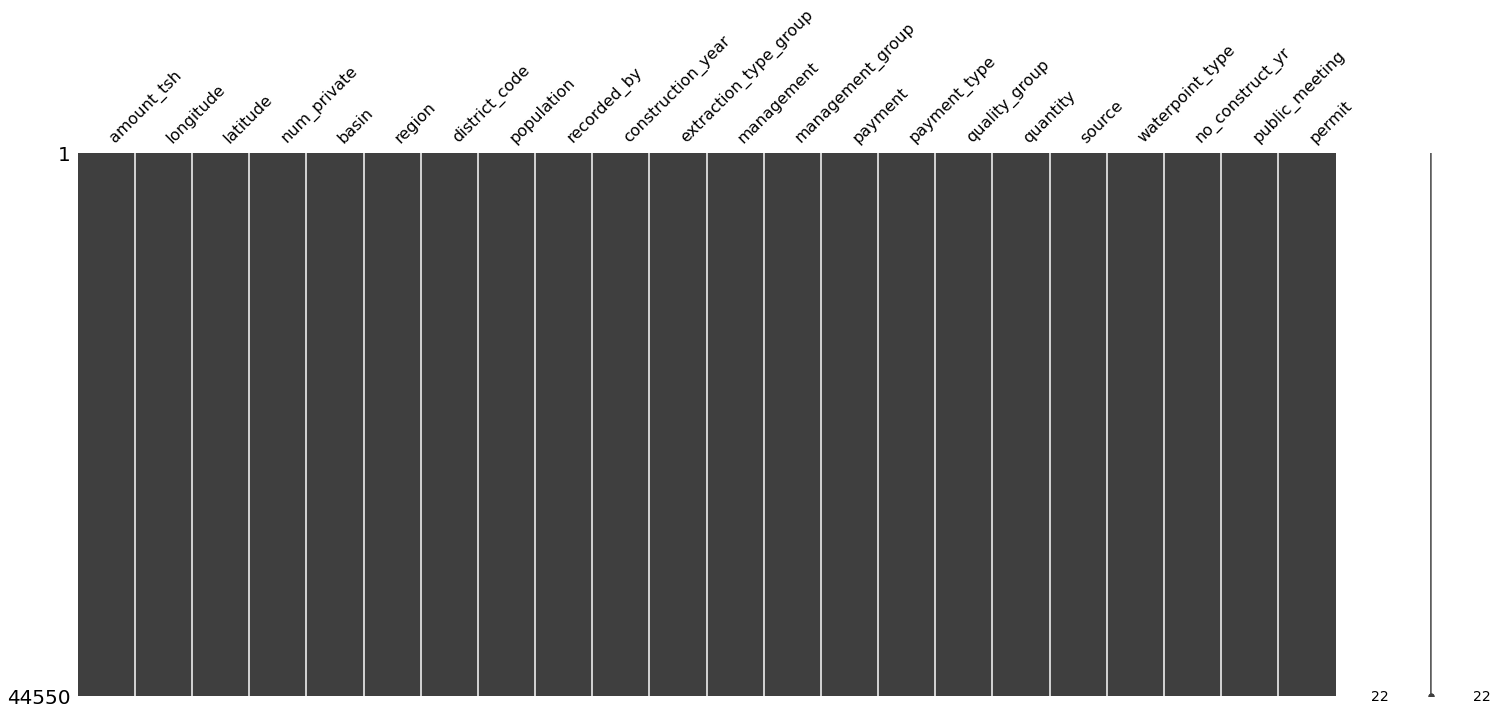

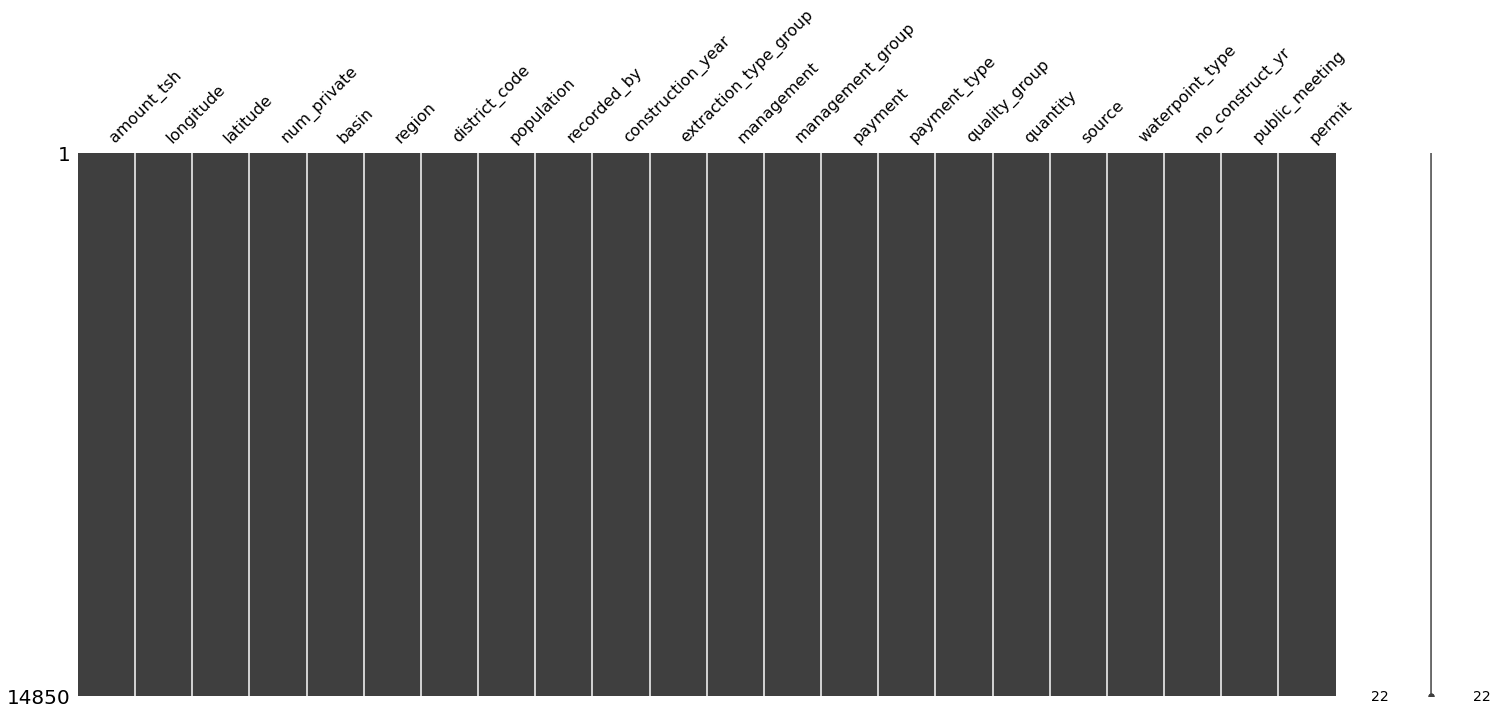

In [92]:
print(count_null(X_train_1))
print(dashes)
print(count_null(X_test_1))

#### One-Hot Encode Categoricals

In [93]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 24947 to 56422
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   longitude              44550 non-null  float64
 2   latitude               44550 non-null  float64
 3   num_private            44550 non-null  int64  
 4   basin                  44550 non-null  object 
 5   region                 44550 non-null  object 
 6   district_code          44550 non-null  int64  
 7   population             44550 non-null  int64  
 8   recorded_by            44550 non-null  object 
 9   construction_year      44550 non-null  int64  
 10  extraction_type_group  44550 non-null  object 
 11  management             44550 non-null  object 
 12  management_group       44550 non-null  object 
 13  payment                44550 non-null  object 
 14  payment_type           44550 non-null  object 
 15

In [94]:
cat_cols = X_train_1.select_dtypes('O')
cat_cols.head()

,basin,region,recorded_by,extraction_type_group,management,management_group,payment,payment_type,quality_group,quantity,source,waterpoint_type,public_meeting,permit
24947,Wami / Ruvu,Pwani,GeoData Consultants Ltd,submersible,vwc,user-group,pay per bucket,per bucket,salty,insufficient,machine dbh,communal standpipe,True,True
22630,Lake Victoria,Mwanza,GeoData Consultants Ltd,nira/tanira,wug,user-group,unknown,unknown,good,enough,shallow well,hand pump,True,False
13789,Lake Victoria,Mwanza,GeoData Consultants Ltd,india mark ii,vwc,user-group,never pay,never pay,good,enough,machine dbh,hand pump,True,True
15697,Internal,Singida,GeoData Consultants Ltd,gravity,wua,user-group,never pay,never pay,good,seasonal,rainwater harvesting,communal standpipe,True,True
22613,Lake Nyasa,Ruvuma,GeoData Consultants Ltd,gravity,vwc,user-group,unknown,unknown,good,dry,spring,communal standpipe,True,True


In [95]:
#len(cat_cols.columns)

In [96]:
num_cols = X_train_1.select_dtypes('number')
len(num_cols.columns)

7

In [97]:
cat_cols.columns

Index(['basin', 'region', 'recorded_by', 'extraction_type_group', 'management',
       'management_group', 'payment', 'payment_type', 'quality_group',
       'quantity', 'source', 'waterpoint_type', 'public_meeting', 'permit'],
      dtype='object')

In [98]:
#'region','region_code','district_code'

cols_hot = ['basin', 'region', 'recorded_by', 'extraction_type_group',
       'management', 'management_group', 'payment',
       'payment_type', 'quality_group', 'quantity',
       'source', 'waterpoint_type', 'public_meeting', 'permit','no_construct_yr']

def one_hot(df_train, df_test, columns=cols_hot):
    one_hot_train = pd.get_dummies(df_train, columns=cols_hot, drop_first=True)
    one_hot_test = pd.get_dummies(df_test, columns=cols_hot, drop_first=True)
    
    return one_hot_train, one_hot_test

In [99]:
one_hot_train, one_hot_test = one_hot(X_train, X_test, cols_hot)

In [100]:
one_hot_train.shape, one_hot_test.shape

((44550, 101), (14850, 101))

#### Scale Data

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
def scale_data(sscaler, X_train_int, X_test_int,y_train):
    #scaler = sscaler
    #transform the training and test sets
    scaled_data_train = sscaler.fit_transform(X_train_int, y_train)
    scaled_data_test = sscaler.transform(X_test_int)
    #convert into a dataframe
    scaled_df_tra = pd.DataFrame(scaled_data_train, columns=X_train_int.columns)
    scaled_df_tes = pd.DataFrame(scaled_data_test, columns=X_test_int.columns)
    
    return scaled_df_tra, scaled_df_tes

In [106]:
train_scale, test_scale = scale_data(StandardScaler(),  one_hot_train, one_hot_test,y_train)

In [107]:
train_scale.shape, test_scale.shape

((44550, 101), (14850, 101))

In [108]:
train_scale.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True,no_construct_yr_True
0,-0.093074,0.616411,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442,-0.729117
1,-0.099150,-5.221778,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.122628,-0.113743,-0.479601,-0.062437,-0.199242,-0.439821,1.585285,-0.630975,-0.034185,-0.959431,-0.336484,-0.008206,1.541

#### Imbalance

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
def smote_resample(y, X_train, y_train):
    # Previous original class distribution
    print('Original class distribution: \n')
    print(y.value_counts())
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    # Preview synthetic sample class distribution
    print('-----------------------------------------')
    print('Synthetic sample class distribution: \n')
    print(pd.Series(y_train_resampled).value_counts()) 
    
    return X_train_resampled, y_train_resampled

In [111]:
train_resampled, y_train_resampled = smote_resample(y, train_scale, y_train)

Original class distribution: 

0    32259
1    22824
2     4317
Name: target, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    24161
1    24161
0    24161
Name: target, dtype: int64


In [112]:
#df_1['lga'].value_counts(dropna=False)
train_resampled.head()

,amount_tsh,longitude,latitude,num_private,district_code,population,construction_year,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting_True,permit_True,no_construct_yr_True
0,-0.093074,0.616411,-0.129019,-0.037802,-0.479998,-0.209732,0.702954,-0.302772,-0.209144,-0.349442,-0.455788,-0.420435,-0.393527,-0.287445,2.976669,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,-0.234014,4.63436,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,-0.401025,-0.348471,-0.078955,-0.045737,-0.089242,2.921563,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,0.681752,-0.123941,-0.22661,-0.211876,-0.351058,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,2.360664,-0.266779,-0.398608,-0.399969,-0.864801,-0.266779,-0.134188,2.360664,-0.398608,-0.062256,-2.422528,-0.1188,3.218090,-0.179992,-1.124921,1.711914,-0.269376,-0.11595,-0.122628,-0.113743,2.085065,-0.062437,-0.199242,-0.439821,-0.630801,-0.630975,-0.034185,1.042285,-0.336484,-0.008206,-0.648606,-0.116644,-0.346889,0.408462,0.729442,-0.729117
1,-0.099150,-5.221778,1.940133,-0.037802,-0.479998,-0.379567,-1.371444,-0.302772,-0.209144,-0.349442,2.194003,-0.420435,-0.393527,-0.287445,-0.335946,-0.118313,-0.196301,-0.313688,-0.243158,-0.222307,-0.280103,-0.165019,-0.166236,-0.185695,-0.288222,-0.269328,-0.173372,4.273254,-0.21578,-0.178458,-0.214580,-0.302551,-0.191188,-0.185889,-0.212454,-0.901196,-0.205730,-0.03793,-0.225183,2.493608,-0.348471,-0.078955,-0.045737,-0.089242,-0.342283,-0.256991,-0.042679,-0.120441,-0.042148,-0.174194,-0.185307,-0.036724,-0.099185,-1.466809,-0.123941,-0.22661,-0.211876,2.848536,-0.127806,-0.174194,-0.099185,0.361857,-0.134188,-0.254501,-0.399969,-0.423610,-0.266779,2.508727,-0.399969,-0.864801,-0.266779,-0.134188,-0.423610,2.508727,-0.062256,0.412792,-0.1188,-0.310743,-0.179992,0.888952,-0.584141,-0.269376,-0.11595,-0.122628,-0.113743,-0.479601,-0.062437,-0.199242,-0.439821,1.585285,-0.630975,-0.034185,-0.959431,-0.336484,-0.008206,1.541

In [113]:
y_train_resampled.head()

0    1
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [114]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score,f1_score, confusion_matrix,classification_report
from sklearn.metrics import precision_score

from yellowbrick.classifier import ROCAUC

from sklearn.model_selection import cross_val_score

In [115]:
y_train.dtype

dtype('int64')

### Create Model
recall-How good is our model at finding wells that don't work. Of postive class, what percentage did we find.

In [116]:
y_test.value_counts()

0    8098
1    5678
2    1074
Name: target, dtype: int64

In [117]:
y_train_resampled.value_counts()

2    24161
1    24161
0    24161
Name: target, dtype: int64

In [118]:
y_test.value_counts(normalize=True)

0    0.545320
1    0.382357
2    0.072323
Name: target, dtype: float64

#### Baseline Model

In [119]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

dummy_clf.score(train_scale, y_train)

0.542334455667789

In [120]:
import tzlocal
import datetime as dt#to get current time
tz = tzlocal.get_localzone()
print(tz)
start = dt.datetime.now(tz)
print(start.strftime("%m/%d/%y - %I:%m %p"))

America/New_York
09/30/20 - 10:09 AM


In [121]:
class Timer() :

    def __init__(self, format_="%m/%d/%y - %I:%m %p"): #when we intialize class its going to perform these actions
        import tzlocal
        import datetime as dt#to get current time
        self.tz = tzlocal.get_localzone() #save and can call out whenever we want
        self.fmt = format_
        
        self.created_at =self.get_time()
        
    def get_time(self): 
        import datetime as dt
        return dt.datetime.now(self.tz)
    
    def start(self): #need to get the time
        time = self.get_time()
        self.start= time
        print(f"[i]Timer started at {self.start.strftime(self.fmt)}")
        
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i]Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total Time= {self.end - self.start}")
        

In [122]:
"""
forest_2 = RandomForestClassifier()
grid_clf = GridSearchCV(forest_2, param_grid)

timer = Timer()
timer.start()

grid_clf.fit(train_resampled, y_train_resampled)

timer.stop()

"""

def eval_classification_model(class_model, X_train,X_test, y_train, y_test,
                              normalize='true',cmap='Blues',figsize=[10,5]):
    """
    Algorithm for classification model
    Args
    df (df)
    X_train (int)
    X_test ()
    y_train ()
    y_test ()
    figsize (dict)
    """
    #Classification Model
    
    timer = Timer()
    timer.start()
    print('\n')
    class_model.fit(X_train, y_train)
    
    
    # get Predictions
    y_hat_train = class_model.predict(X_train)
    y_hat_test =  class_model.predict(X_test)
    #evaluate model
    print("Training Accuracy on  Model: {}".format(accuracy_score(y_train, y_hat_train)))
    print("Testing Accuracy on  Model: {}".format(accuracy_score(y_test, y_hat_test)))
    # recall_score(y, lr.predict(X), average=None)
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None))) #average='micro'
    print('Recall: {}'.format(recall_score(y_test, y_hat_test, average=None)[1]))
    scores = cross_val_score(class_model,X_test, y_test,cv=5)
    print('Cross-validation scores on testing set: {}'.format(scores))
    print('Average cross-validation score on testing set: {:.2f}'.format(scores.mean()))
    
    #print("Precision Score on  Model: {}".format(precision_score(y_test, y_hat_test, average=None)))
    #print('Precision: {}'.format(recall_score(y_test, y_hat_test,average='None')))
    print(dashes)
    print('\n')
    #adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
    ada_cf_matrix = confusion_matrix(y_hat_test,y_test)  #axes[0]
    print(ada_cf_matrix)
    print('\n')
    
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_hat_test,target_names=classes))  
    print(dashes)
    print('\n')

    fig, axes = plt.subplots(ncols=2,figsize= figsize)   #ncols=2,
    #Confusion Matrix
    metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=normalize,
                                  cmap=cmap, ax=axes[0])  #axes[0]
    
#     metrics.plot_confusion_matrix(class_model,X_test,y_test,normalize=None,
#                                   cmap=cmap, ax=axes[1])  #axes[0]

# p1, = plt.plot([1, 2, 3], label='Line 1')
# p2, = plt.plot([3, 2, 1], label='Line 2')
# plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    visualizer = ROCAUC(class_model, classes=["functioning", "non-functioning",'functioning needs repair'],ax=axes[1])
 #   plt.legend(handles=[visualizer], title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
 #   plt.legend((bbox_to_anchor=(0.4,0.8), loc="upper right")
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    """
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    #plt.legend(visualizer,loc='center left', bbox_to_anchor=(1, 0.5))
    visualizer.show() 
    
    timer.stop()
    return class_model


#### Logistic Regression

[i]Timer started at 09/30/20 - 10:09 AM


Training Accuracy on  Model: 0.6387842666556296
Testing Accuracy on  Model: 0.6275420875420875
Recall: [0.62855026 0.62064107 0.65642458]
Recall: 0.6206410707995773
Cross-validation scores on testing set: [0.73030303 0.72895623 0.71919192 0.72323232 0.71986532]
Average cross-validation score on testing set: 0.72
------------------------------------------------------------


[[5090 1195  245]
 [ 927 3524  124]
 [2081  959  705]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.63      0.70      8098
1/Non-functioning       0.77      0.62      0.69      5678
   2/Needs Repair       0.19      0.66      0.29      1074

         accuracy                           0.63     14850
        macro avg       0.58      0.64      0.56     14850
     weighted avg       

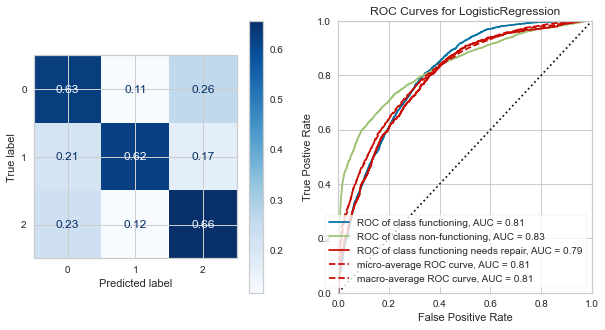

[i]Timer ended at 09/30/20 - 10:09 AM
- Total Time= 0:00:08.748579


In [123]:
model = eval_classification_model(LogisticRegression(), train_resampled, test_scale, 
                 y_train_resampled,y_test)

[i]Timer started at 09/30/20 - 10:09 AM


Training Accuracy on  Model: 0.6312238731840569
Testing Accuracy on  Model: 0.5830976430976431
Recall: [0.59039269 0.54596689 0.72439479]
Recall: 0.5459668897499119
Cross-validation scores on testing set: [0.69090909 0.6976431  0.68215488 0.6989899  0.67710438]
Average cross-validation score on testing set: 0.69
------------------------------------------------------------


[[4781 1167  213]
 [ 506 3100   83]
 [2811 1411  778]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.59      0.67      8098
1/Non-functioning       0.84      0.55      0.66      5678
   2/Needs Repair       0.16      0.72      0.26      1074

         accuracy                           0.58     14850
        macro avg       0.59      0.62      0.53     14850
     weighted avg       

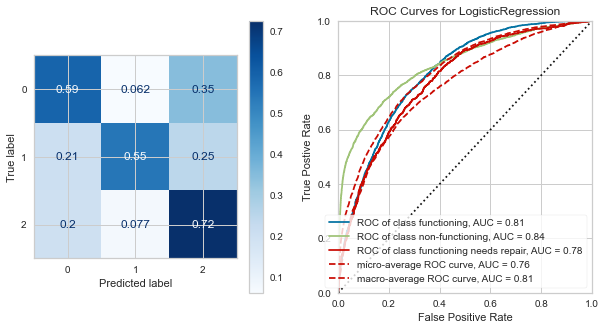

[i]Timer ended at 09/30/20 - 10:09 AM
- Total Time= 0:03:05.117892


In [124]:
# train_resampled, y_train_resampled
# functional':0,'non functional':1,'functional needs repair':2})
#, classes={0:'functional',1:'non functional',2:'functional needs repair'}

model = eval_classification_model(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear'), train_resampled, test_scale, 
                 y_train_resampled,y_test)

#### GridsearchCV

In [125]:
from sklearn.model_selection import GridSearchCV
#f1 score-averaging
model = LogisticRegression()
params = {'C':[1e12, 0.001, 0.01, 0.1, 1,10, 100], 'fit_intercept':[True,False]}
gridsearch = GridSearchCV(model,params, scoring='recall_macro')

In [126]:
# train_resampled, y_train_resampled
gridsearch.fit(train_resampled, y_train_resampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1000000000000.0, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False]},
             scoring='recall_macro')

In [127]:
#of all params it tried thi gave it hte highest score
best_params = gridsearch.best_params_
best_params

{'C': 0.1, 'fit_intercept': True}

In [128]:
#this is hte actual model it trained
best_model = gridsearch.best_estimator_
best_model

LogisticRegression(C=0.1)

[i]Timer started at 09/30/20 - 10:09 AM


Training Accuracy on  Model: 0.6384669508712387
Testing Accuracy on  Model: 0.6260606060606061
Recall: [0.62743887 0.6199366  0.64804469]
Recall: 0.6199365973934484
Cross-validation scores on testing set: [0.73063973 0.72828283 0.71851852 0.72390572 0.71717172]
Average cross-validation score on testing set: 0.72
------------------------------------------------------------


[[5081 1201  255]
 [ 930 3520  123]
 [2087  957  696]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.63      0.69      8098
1/Non-functioning       0.77      0.62      0.69      5678
   2/Needs Repair       0.19      0.65      0.29      1074

         accuracy                           0.63     14850
        macro avg       0.58      0.63      0.56     14850
     weighted avg       

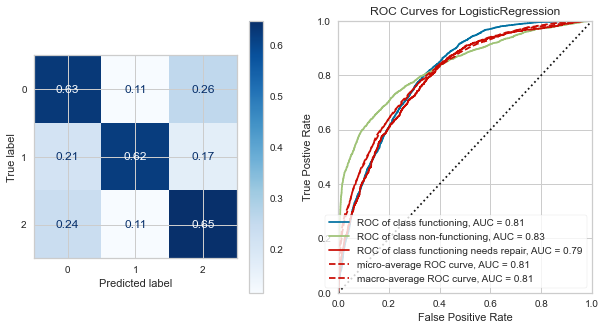

[i]Timer ended at 09/30/20 - 10:09 AM
- Total Time= 0:00:07.353186


In [129]:
# train_resampled, y_train_resampled

# best_model = LogisticRegression(**best_params)
# best_model.fit(train_scale,y_train)
model = eval_classification_model(best_model,train_resampled, test_scale,y_train_resampled, y_test) #,classes=['Died','Survived']

#### K Nearest Neighbors Classifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier

[i]Timer started at 09/30/20 - 10:09 AM


Training Accuracy on  Model: 0.8647544941572507
Testing Accuracy on  Model: 0.7235690235690235
Recall: [0.73795999 0.73793589 0.53910615]
Recall: 0.7379358929200422
Cross-validation scores on testing set: [0.71515152 0.72188552 0.71952862 0.71144781 0.71144781]
Average cross-validation score on testing set: 0.72
------------------------------------------------------------


[[5976 1069  333]
 [1176 4190  162]
 [ 946  419  579]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.81      0.74      0.77      8098
1/Non-functioning       0.76      0.74      0.75      5678
   2/Needs Repair       0.30      0.54      0.38      1074

         accuracy                           0.72     14850
        macro avg       0.62      0.67      0.63     14850
     weighted avg       

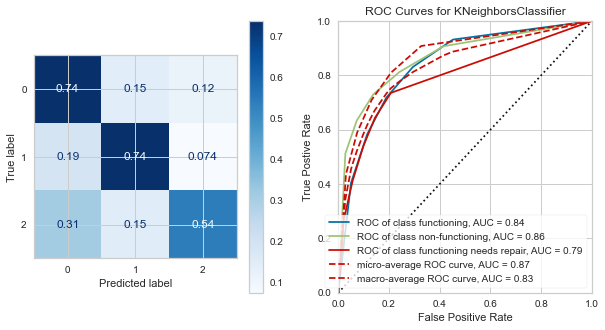

[i]Timer ended at 09/30/20 - 10:09 AM
- Total Time= 0:18:09.391415


In [131]:
#train_resampled, test_scale,y_train_resampled, y_test
model = eval_classification_model(KNeighborsClassifier(), 
                                                    train_resampled, test_scale, y_train_resampled,y_test)

#### KNN / Gridsearch

In [132]:
model = KNeighborsClassifier()
params = {'n_neighbors':range(1, 18, 2)} #1,26,2

gridsearch = GridSearchCV(model,params, scoring='recall_macro',cv=3) #f1_macro
gridsearch.fit(train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 18, 2)},
             scoring='recall_macro')

In [133]:
best_params_k6 = gridsearch.best_params_
best_params_k6

{'n_neighbors': 1}

In [134]:
best_model_k6 = gridsearch.best_estimator_
best_model_k6

KNeighborsClassifier(n_neighbors=1)

[i]Timer started at 09/30/20 - 12:09 PM


Training Accuracy on  Model: 0.9936812769890871
Testing Accuracy on  Model: 0.730976430976431
Recall: [0.75673006 0.74427615 0.46648045]
Recall: 0.7442761535752025
Cross-validation scores on testing set: [0.69494949 0.70606061 0.6986532  0.70673401 0.7037037 ]
Average cross-validation score on testing set: 0.70
------------------------------------------------------------


[[6128 1171  402]
 [1250 4226  171]
 [ 720  281  501]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.80      0.76      0.78      8098
1/Non-functioning       0.75      0.74      0.75      5678
   2/Needs Repair       0.33      0.47      0.39      1074

         accuracy                           0.73     14850
        macro avg       0.63      0.66      0.64     14850
     weighted avg       0

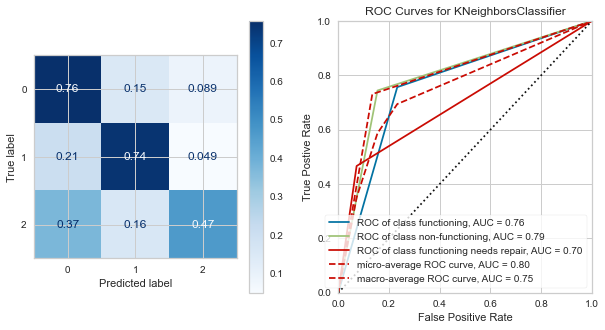

[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:13:20.970096


In [135]:
knn_model = eval_classification_model(best_model_k6,train_resampled, test_scale,y_train_resampled, y_test) #,classes=['Died','Survived']

#### Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

[i]Timer started at 09/30/20 - 10:09 PM


Training Accuracy on  Model: 0.9953644302802036
Testing Accuracy on  Model: 0.7775757575757576
Recall: [0.81328723 0.78231772 0.48324022]
Recall: 0.7823177175061642
Cross-validation scores on testing set: [0.76026936 0.76228956 0.76026936 0.76936027 0.75589226]
Average cross-validation score on testing set: 0.76
------------------------------------------------------------


[[6586 1020  398]
 [ 916 4442  157]
 [ 596  216  519]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.82      0.81      0.82      8098
1/Non-functioning       0.81      0.78      0.79      5678
   2/Needs Repair       0.39      0.48      0.43      1074

         accuracy                           0.78     14850
        macro avg       0.67      0.69      0.68     14850
     weighted avg       

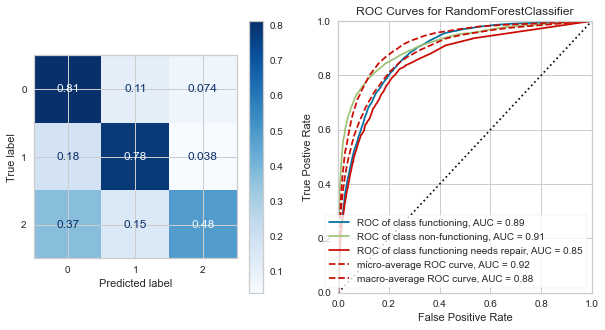

[i]Timer ended at 09/30/20 - 10:09 PM
- Total Time= 0:00:27.050487


In [163]:
"""
(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced'

"""
rforest = eval_classification_model(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

In [138]:
rforest

RandomForestClassifier(max_depth=5)

In [139]:
df_import = pd.Series(rforest.feature_importances_,index=train_resampled.columns, name='Importance')
df_import.sort_values()

waterpoint_type_dam                     0.000000
extraction_type_group_other handpump    0.000000
extraction_type_group_wind-powered      0.000000
management_other - school               0.000003
extraction_type_group_rope pump         0.000010
                                          ...   
extraction_type_group_gravity           0.061176
quantity_enough                         0.065762
waterpoint_type_other                   0.085492
longitude                               0.093735
extraction_type_group_other             0.119654
Name: Importance, Length: 101, dtype: float64

In [140]:
def plot_importance(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance

amount_tsh                         0.028662
longitude                          0.093735
latitude                           0.027118
num_private                        0.000107
district_code                      0.021861
                                     ...   
waterpoint_type_improved spring    0.002353
waterpoint_type_other              0.085492
public_meeting_True                0.002119
permit_True                        0.005844
no_construct_yr_True               0.006410
Length: 101, dtype: float64

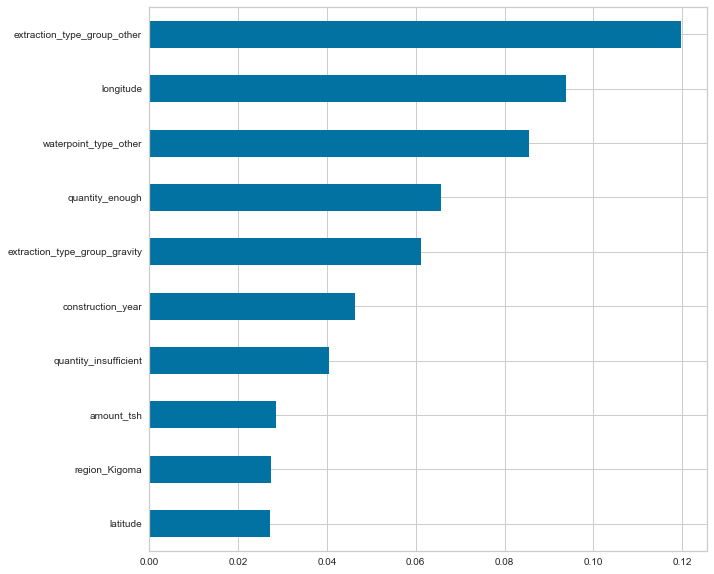

In [141]:
plot_importance(rforest)

In [142]:
def ensemble_features(forest, top_n=10, figsize=(10,10)):
    df_importance = pd.Series(forest.feature_importances_,index=train_resampled.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(kind='barh', figsize=figsize)
    
    return df_importance
    

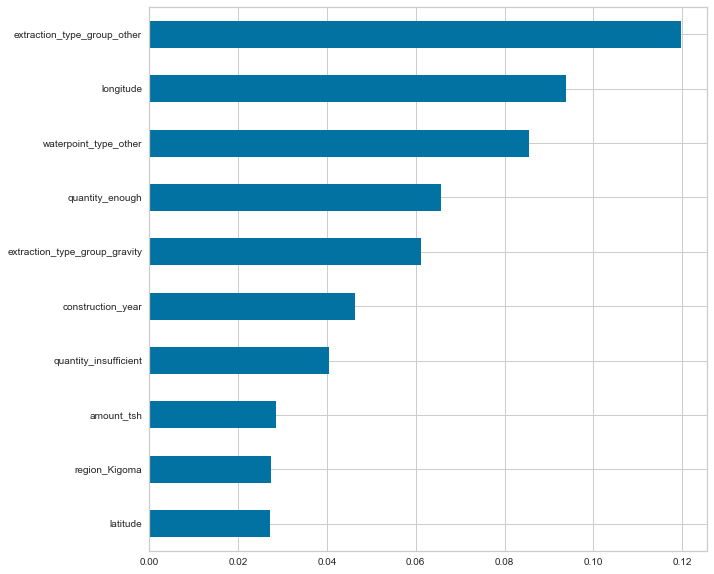

In [143]:
#top 10 imporant features as determined by our model
#what were most important things in determing the output
forest_1 = ensemble_features(rforest)

In [146]:
"""
model = LogisticRegression()
params = {'C':[0.001, 0.01, 0.1, 1,10, 100]}
gridsearch = GridSearchCV(model,params, scoring='f1_macro')

gridsearch.fit(train_resampled, y_train_resampled)
----------------
timer = Timer()
#     #print(timer.created_at)
    timer.start()
    
    grid_clf.fit(X_train, y_train)
    #timer.stop()
    timer.stop()
    
    #grid_clf.best_params_
    
    return grid_clf.best_params_
"""
param_grid = {"criterion":["gini",'entropy'],
                 'max_depth':[None,3],#[None,5,3,8,10]
                 'max_features':['auto','sqrt',3,5]}#list of options

forest_2 = RandomForestClassifier()
grid_clf = GridSearchCV(forest_2, param_grid)

timer = Timer()
timer.start()

grid_clf.fit(train_resampled, y_train_resampled)

timer.stop()

[i]Timer started at 09/30/20 - 12:09 PM
[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:12:59.798420


In [147]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}

[i]Timer started at 09/30/20 - 12:09 PM


Training Accuracy on  Model: 0.9277347791896031
Testing Accuracy on  Model: 0.7782491582491583
Recall: [0.80859471 0.78055653 0.53724395]
Recall: 0.7805565339908418
Cross-validation scores on testing set: [0.78148148 0.78249158 0.77542088 0.78720539 0.76228956]
Average cross-validation score on testing set: 0.78
------------------------------------------------------------


[[6548  970  364]
 [ 824 4432  133]
 [ 726  276  577]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.83      0.81      0.82      8098
1/Non-functioning       0.82      0.78      0.80      5678
   2/Needs Repair       0.37      0.54      0.43      1074

         accuracy                           0.78     14850
        macro avg       0.67      0.71      0.69     14850
     weighted avg       

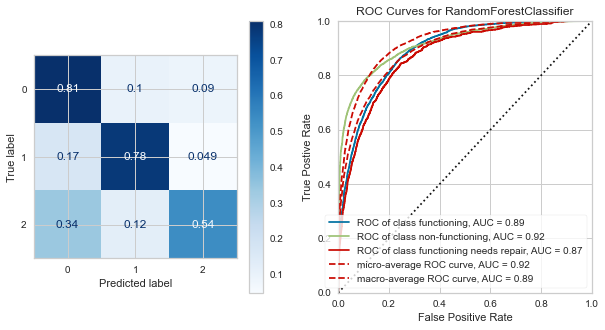

[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:00:56.270718


In [148]:
"""
(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25

"""
rforest = eval_classification_model(RandomForestClassifier(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### Adaboost and Gradient Boosting classifiers 

In [149]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

[i]Timer started at 09/30/20 - 12:09 PM


Training Accuracy on  Model: 0.6469930880344357
Testing Accuracy on  Model: 0.6253872053872054
Recall: [0.64299827 0.61271574 0.55959032]
Recall: 0.612715744980627
Cross-validation scores on testing set: [0.71919192 0.71178451 0.71010101 0.72188552 0.71043771]
Average cross-validation score on testing set: 0.71
------------------------------------------------------------


[[5207 1266  299]
 [1150 3479  174]
 [1741  933  601]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.77      0.64      0.70      8098
1/Non-functioning       0.72      0.61      0.66      5678
   2/Needs Repair       0.18      0.56      0.28      1074

         accuracy                           0.63     14850
        macro avg       0.56      0.61      0.55     14850
     weighted avg       0

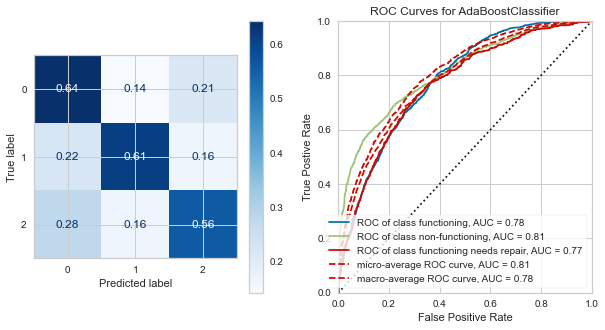

[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:00:16.855891


In [150]:
adaboost = eval_classification_model(AdaBoostClassifier(random_state=42), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

[i]Timer started at 09/30/20 - 12:09 PM


Training Accuracy on  Model: 0.7236593408109487
Testing Accuracy on  Model: 0.6736026936026936
Recall: [0.7068412  0.64265586 0.58659218]
Recall: 0.642655864741106
Cross-validation scores on testing set: [0.75387205 0.75420875 0.74006734 0.74882155 0.73703704]
Average cross-validation score on testing set: 0.75
------------------------------------------------------------


[[5724 1309  297]
 [ 764 3649  147]
 [1610  720  630]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.78      0.71      0.74      8098
1/Non-functioning       0.80      0.64      0.71      5678
   2/Needs Repair       0.21      0.59      0.31      1074

         accuracy                           0.67     14850
        macro avg       0.60      0.65      0.59     14850
     weighted avg       0

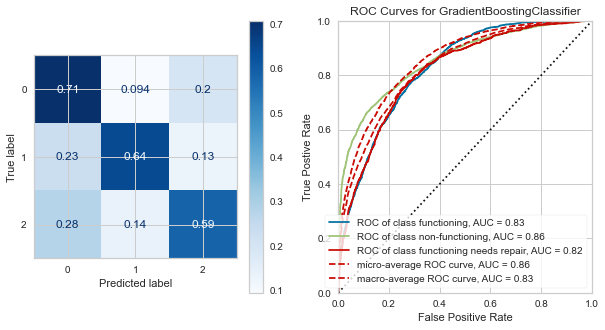

[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:02:26.595882


In [151]:
#gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_clf = eval_classification_model(GradientBoostingClassifier(random_state=42), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### XGBoost

In [152]:
import xgboost as xgb

[i]Timer started at 09/30/20 - 12:09 PM


Training Accuracy on  Model: 0.8535518673344095
Testing Accuracy on  Model: 0.7584511784511785
Recall: [0.79649296 0.74040155 0.56703911]
Recall: 0.7404015498414935
Cross-validation scores on testing set: [0.78282828 0.76868687 0.77205387 0.77306397 0.76397306]
Average cross-validation score on testing set: 0.77
------------------------------------------------------------


[[6450 1121  340]
 [ 749 4204  125]
 [ 899  353  609]]


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.82      0.80      0.81      8098
1/Non-functioning       0.83      0.74      0.78      5678
   2/Needs Repair       0.33      0.57      0.41      1074

         accuracy                           0.76     14850
        macro avg       0.66      0.70      0.67     14850
     weighted avg       

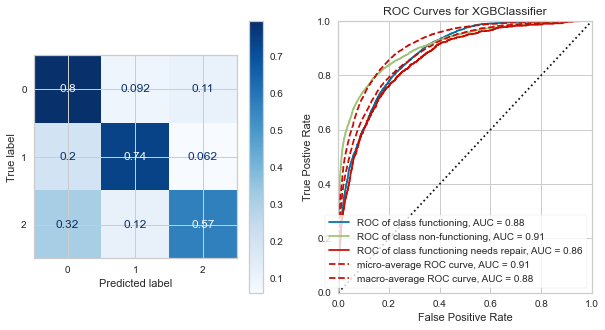

[i]Timer ended at 09/30/20 - 12:09 PM
- Total Time= 0:02:34.855309


In [153]:
#xgb.XGBClassifier()
xgb_clf = eval_classification_model(xgb.XGBClassifier(), 
                                            train_resampled, test_scale, y_train_resampled,y_test)

#### Geospatial Visualization

In [154]:
"""
df_1[df_1['longitude']>0] [df_1['latitude']<0][df_1['construction_year']>0].plot\
(kind='scatter', x="longitude", y="latitude", alpha=0.4,
s=df_1["population"]/10, label="population", figsize=(14,10),

c="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False);
plt.title("Population Size, Construction Years, & Locations of Waterpumps in Tanzania", 
         fontsize =16, fontweight='bold')
plt.legend;
"""
# df_1[df_1['longitude']>0] [df_1['latitude']<0].plot\
# (kind='scatter', x="longitude", y="latitude", alpha=0.4,
# s=df_1["population"]/10, label="population", figsize=(14,10),

# c= cmap=plt.get_cmap("jet"), colorbar=True,
# sharex=False);
# plt.title("Population Size, Construction Years, & Locations of Waterpumps in Tanzania", 
#          fontsize =16, fontweight='bold')
# plt.legend;

'\ndf_1[df_1[\'longitude\']>0] [df_1[\'latitude\']<0][df_1[\'construction_year\']>0].plot(kind=\'scatter\', x="longitude", y="latitude", alpha=0.4,\ns=df_1["population"]/10, label="population", figsize=(14,10),\n\nc="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,\nsharex=False);\nplt.title("Population Size, Construction Years, & Locations of Waterpumps in Tanzania", \n         fontsize =16, fontweight=\'bold\')\nplt.legend;\n'

In [155]:
def get_center_latlong(df_1):
    # get the center of my map for plotting
    centerlat = (df_1['latitude'].max() + df_1['latitude'].min()) / 2
    centerlong = (df_1['longitude'].max() + df_1['longitude'].min()) / 2
    return centerlat, centerlong


In [156]:
# import geopandas

# gdf = geopandas.GeoDataFrame(
#         df, geometry=geopandas.points_from_xy(df_1.longitude, df_1.latitude))

# functional = gdf.where(gdf['target'] == 'functional')
# repair = gdf.where(gdf['target'] == 'functional needs repair')
# broken = gdf.where(gdf['target'] == 'non functional')

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# # We restrict to Africa
# ax = world[world.continent == 'Africa'].plot(
#     color='white', edgecolor='gray')

# ax.scatter(functional['longitude'], functional['latitude'],
#            c='green',alpha=.5, s=1)

# ax.scatter(repair['longitude'], repair['latitude'],
#            c='yellow', alpha=.5, s=1)

# ax.scatter(broken['longitude'], broken['latitude'],
#            c='red', alpha=.5, s=1)

# plt.ylim(-12, 0)
# plt.xlim(28,41)

# plt.show()
import folium

# grab the center of our map using our cool function
center = get_center_latlong(df_1)

# create a new map object
m = folium.Map(location=center, zoom_start=10)

# save our map to an interactive html file
m.save('circle_map.html')

In [157]:
# Same as before, we get the center and make the map object
center = get_center_latlong(df_1)
m = folium.Map(location=center, zoom_start=10)

# go through each home in set, make circle, and add to map.
for i in range(len(df_1)):
    folium.Circle(
        location=[df_1.iloc[i]['latitude'], df_1.iloc[i]['longitude']],
        radius=10,
    ).add_to(m)

# Same as before, we save it to file
m.save('circle_map.html')